In [5]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
import seaborn as sn
import sys
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
# Load training set
dataframes_training_metadata = pd.read_csv('data/training_set_metadata.csv')
dataframes_training_metadata = dataframes_training_metadata.values

# Shuffle the training dataset
idx = np.arange(dataframes_training_metadata.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
dataframes_training_metadata = dataframes_training_metadata[idx]

y = dataframes_training_metadata[:,[11]]
# Extract features from the training set so that they match the features from test set below
X = np.nan_to_num(dataframes_training_metadata[:,[0,1,2,5,6,7,8,9,10]])

# Load test set (A large subset of the test set)
dataframes_test_metadata = pd.read_csv('data/plasticc_test_metadata.csv')
dataframes_test_metadata = dataframes_test_metadata.values

# Shuffle the test dataset
idx = np.arange(dataframes_test_metadata.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
dataframes_test_metadata = dataframes_test_metadata[idx]

X_test = np.nan_to_num(dataframes_test_metadata[300000:500000,:9])
y_test = dataframes_test_metadata[300000:500000,[10]]

# Use some of the test data as training
y = np.append(y,dataframes_test_metadata[:300000,[10]],0)
X = np.append(X,np.nan_to_num(dataframes_test_metadata[:300000,:9]),0)


In [32]:
# Build a reasonably balanced and small dataset
new_X_train = []
new_y_train = []
new_X_test = []
new_y_test = []
classes = np.unique(y)
for i in classes:
    counter = 0
    random_value = np.random.randint(1000, 1500, size=(1,))
    for j in range(len(X)):
        if(i == y[j]):
            new_X_train.append(X[j])
            new_y_train.append(y[j])
            counter += 1
        if(counter == random_value[0]):
            break
            
for i in classes:
    counter = 0
    random_value = np.random.randint(500, 1000, size=(1,))
    for j in range(len(X_test)):
        if(i == y_test[j]):
            new_X_test.append(X_test[j])
            new_y_test.append(y_test[j])
            counter += 1
        if(counter == random_value[0]):
            break

X = np.array(new_X_train)
y = np.array(new_y_train)
X_test = np.array(new_X_test)
y_test = np.array(new_y_test)

In [7]:
# Calculate variance for each feature in the dataset
for i in range(X.shape[1]):
    print("Variance for X feature", i, " = ", np.var(X[:,i]))
    print("Variance for X_test Col,", i, "=", np.var(X_test[:,i]))

Variance for X feature 0  =  1449600137401290.5
Variance for X_test Col, 0 = 1430373347556669.0
Variance for X feature 1  =  11953.483827741942
Variance for X_test Col, 1 = 11902.473433082647
Variance for X feature 2  =  313.03858875176456
Variance for X_test Col, 2 = 311.9700875883793
Variance for X feature 3  =  0.015559802062880383
Variance for X_test Col, 3 = 0.009409749999999995
Variance for X feature 4  =  4.767816858409633
Variance for X_test Col, 4 = 2.9159514503006347
Variance for X feature 5  =  0.20372653597814
Variance for X_test Col, 5 = 0.20350433634569512
Variance for X feature 6  =  0.07570832842566293
Variance for X_test Col, 6 = 0.076811201141397
Variance for X feature 7  =  265.7532395329466
Variance for X_test Col, 7 = 262.0438177671927
Variance for X feature 8  =  0.024162336087241186
Variance for X_test Col, 8 = 0.02405696909360477


In [8]:
# List the frequencey of each class in the training dataset
count = 0
summ = 0
y_len = len(y)
classes = np.unique(y)
w = []
for class_ in classes:    
    for i in range(y_len):
        if(y[i] == class_):
            count+=1
    print(class_,count)
    summ += count
    w.append(count/y_len)
    count = 0
print(w)

6.0 273
15.0 1685
16.0 9090
42.0 87145
52.0 5753
53.0 140
62.0 15657
64.0 116
65.0 9114
67.0 3707
88.0 9165
90.0 144526
92.0 17139
95.0 3262
991.0 52
992.0 140
993.0 788
994.0 96
[0.0008868012785530521, 0.005473480418908033, 0.02952755905511811, 0.283078012525662, 0.018687793976248018, 0.00045476988643746265, 0.050859515085366805, 0.00037680933447675475, 0.029605519607078818, 0.012041656921597671, 0.029771185779995324, 0.46947194719471946, 0.055673579168940515, 0.01059613835399288, 0.0001689145292482004, 0.00045476988643746265, 0.0025597047893765753, 0.00031184220784283154]


In [13]:
# Meaningless! Just to see what happens!
clf = LogisticRegression(multi_class = 'ovr').fit(X, y)
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))


Accuracy: 0.06


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Running a SVC classifier using crammer_singer strategy for multi class classification. 
# NOT recommended according to scikit-learn documentation

SVC_CS = LinearSVC(multi_class="crammer_singer")
Predictions_SVC_CS = SVC_CS.fit(X, y).predict(X_test)

print("The original classes in the test set are", np.unique(y_test), "\n")
print("The predicted classes are", np.unique(Predictions_SVC_CS), "\n")
print("Missing the following classes in the prediction", np.setdiff1d(np.unique(y_test),np.unique(Predictions_SVC_CS)), "\n")
print("The accuracy for Linear SVC Crammer Singer classifier is " + "{:.2%}".format(SVC_CS.score(X_test, y_test)))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
# Running a SVC classifier using One-Vs-Rest strategy for multi class classification.
SVC_OVR = LinearSVC(multi_class="ovr")
Predictions_SVC_OVR = SVC_OVR.fit(X,y).predict(X_test)

print("The original classes in the test set are", np.unique(y_test), "\n")
print("The predicted classes are", np.unique(Predictions_SVC_OVR), "\n")
print("Missing the following classes in the prediction", np.setdiff1d(np.unique(y_test),np.unique(Predictions_SVC_OVR)), "\n")
print("The accuracy for Linear SVC One-Vs-Rest classifier is " + "{:.2%}".format(SVC_OVR.score(X_test, y_test)))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [65. 88. 90. 95.] 

Missing the following classes in the prediction [  6.  15.  16.  42.  52.  53.  62.  64.  67.  92. 991. 992. 993. 994.] 

The accuracy for Linear SVC One-Vs-Rest classifier is 5.29%


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [42. 65. 90. 92. 95.] 

Missing the following classes in the prediction [  6.  15.  16.  52.  53.  62.  64.  67.  88. 991. 992. 993. 994.] 

The accuracy for Linear SVC One-Vs-One classifier is 53.98%


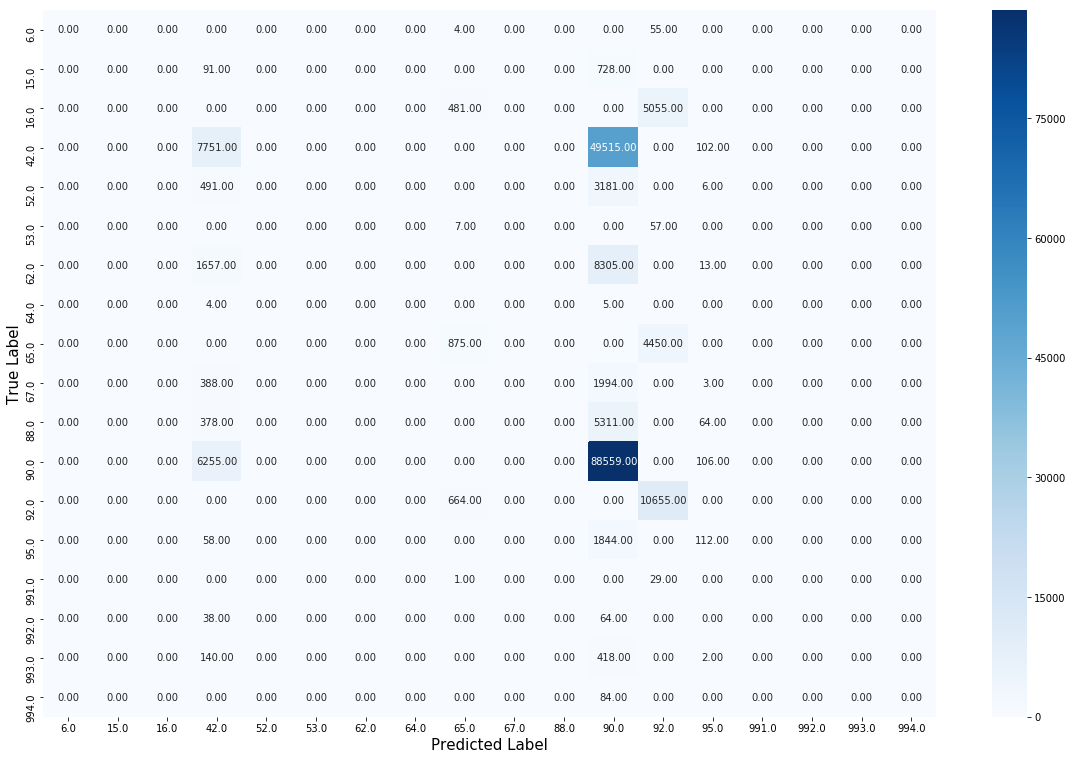

In [27]:
# Running a OneVsOneClassifier classifier using LinearSVC as the estimator.
SVC_OVO = OneVsOneClassifier(LinearSVC(penalty='l1', dual=False, tol=1e-13), -1)
Predictions_SVC_OVO = SVC_OVO.fit(X,y).predict(X_test)

print("The original classes in the test set are", np.unique(y_test), "\n")
print("The predicted classes are", np.unique(Predictions_SVC_OVO), "\n")
print("Missing the following classes in the prediction", np.setdiff1d(np.unique(y_test),np.unique(Predictions_SVC_OVO)), "\n")
print("The accuracy for Linear SVC One-Vs-One classifier is " + "{:.2%}".format(SVC_OVO.score(X_test, y_test)))
confusion_matrix_plot(y_test, Predictions_SVC_OVO, 'LinearSVC_OVO')

In [31]:
# Running a OneVsOneClassifier classifier using LinearSVC (dual formulation) as the estimator.
SVC_OVO = OneVsOneClassifier(LinearSVC(dual=True, C=100, tol=1e-13), -1)
Predictions_SVC_OVO = SVC_OVO.fit(X,y).predict(X_test)

print("The original classes in the test set are", np.unique(y_test), "\n")
print("The predicted classes are", np.unique(Predictions_SVC_OVO), "\n")
print("Missing the following classes in the prediction", np.setdiff1d(np.unique(y_test),np.unique(Predictions_SVC_OVO)), "\n")
print("The accuracy for Linear SVC One-Vs-One classifier is " + "{:.2%}".format(SVC_OVO.score(X_test, y_test)))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [16. 42. 62. 67. 88. 90. 92.] 

Missing the following classes in the prediction [  6.  15.  52.  53.  64.  65.  95. 991. 992. 993. 994.] 

The accuracy for Linear SVC One-Vs-One classifier is 51.32%


In [38]:
# Running a OneVsOneClassifier classifier using LinearSVC as the estimator (balanced) for different values of C.
C_values = [0.001, 1, 100, 1000, 10000]
classes = np.unique(y_test)
test_acc = {}
train_acc = {}

for C_value in C_values:
    SVC_OVO_BL = OneVsOneClassifier(LinearSVC(random_state=112, C=C_value, penalty='l2', dual=True, tol=1e-13, class_weight='balanced', fit_intercept=False), -1)
    Predictions_SVC_OVO_BL = SVC_OVO_BL.fit(X,y).predict(X_test)
    print("For C = ", C_value)
    print("The original classes in the test set are",classes , "\n")
    print("The predicted classes are", np.unique(Predictions_SVC_OVO_BL), "\n")
    print("Missing the following classes in the prediction", np.setdiff1d(classes,np.unique(Predictions_SVC_OVO_BL)), "\n")
    test_accuracy = SVC_OVO_BL.score(X_test, y_test)
    print("The accuracy for Linear SVC One-Vs-One classifier is " + "{:.2%}".format(test_accuracy))
    train_accuracy = SVC_OVO_BL.score(X, y)
    print("The training accuracy for Linear SVC One-Vs-One classifier is " + "{:.2%}".format(train_accuracy))

    test_acc[C_value] = test_accuracy
    train_acc[C_value] = train_accuracy
print("Final Test Accuracies: ", test_acc)
print("Final Train Accuracies: ", train_acc)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For C =  0.001
The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [16. 42. 62. 65. 88. 90. 92.] 

Missing the following classes in the prediction [  6.  15.  52.  53.  64.  67.  95. 991. 992. 993. 994.] 

The accuracy for Linear SVC One-Vs-One classifier is 12.39%
The training accuracy for Linear SVC One-Vs-One classifier is 15.79%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For C =  1
The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [42. 62. 67. 88. 90. 92.] 

Missing the following classes in the prediction [  6.  15.  16.  52.  53.  64.  65.  95. 991. 992. 993. 994.] 

The accuracy for Linear SVC One-Vs-One classifier is 21.02%
The training accuracy for Linear SVC One-Vs-One classifier is 25.63%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For C =  100
The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [16. 42. 62. 65. 67. 88. 90. 92.] 

Missing the following classes in the prediction [  6.  15.  52.  53.  64.  95. 991. 992. 993. 994.] 

The accuracy for Linear SVC One-Vs-One classifier is 20.46%
The training accuracy for Linear SVC One-Vs-One classifier is 23.45%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For C =  1000
The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [16. 42. 62. 65. 67. 88. 90. 92.] 

Missing the following classes in the prediction [  6.  15.  52.  53.  64.  95. 991. 992. 993. 994.] 

The accuracy for Linear SVC One-Vs-One classifier is 20.46%
The training accuracy for Linear SVC One-Vs-One classifier is 23.45%


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


For C =  10000
The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [16. 42. 62. 65. 67. 88. 90. 92.] 

Missing the following classes in the prediction [  6.  15.  52.  53.  64.  95. 991. 992. 993. 994.] 

The accuracy for Linear SVC One-Vs-One classifier is 20.46%
The training accuracy for Linear SVC One-Vs-One classifier is 23.45%
Final Test Accuracies:  {0.001: 0.12390276839972991, 1: 0.21016205266711682, 100: 0.20461024833070748, 1000: 0.20461024833070748, 10000: 0.20461024833070748}
Final Train Accuracies:  {0.001: 0.15792463134898962, 1: 0.25628618241398143, 100: 0.23452758055707265, 1000: 0.23452758055707265, 10000: 0.23452758055707265}


In [9]:
# Running a OneVsOneClassifier classifier on transformed features using LinearSVC as the estimator.
C_values = [0.001, 1, 100, 1000, 10000]
classes = np.unique(y_test)
test_acc = {}
train_acc = {}
losses_dict = {}
scaler = StandardScaler()
scaler.fit(X)
features_scaled_train = scaler.transform(X)
scaler.fit(X_test)
features_scaled_test = scaler.transform(X_test)

for comp in range(2,10,2):
    ar_train_acc = []
    ar_test_acc = []
    losses_per_ncomponent = []

    pca = PCA(n_components = comp)
    pca.fit(features_scaled_train)
    features_scaled_pca_train = pca.transform(features_scaled_train)
    pca = PCA(n_components = comp)
    pca.fit(features_scaled_test)
    features_scaled_pca_test = pca.transform(features_scaled_test)

    for C_value in C_values:
        SVC_OVO = OneVsOneClassifier(LinearSVC(random_state=112, C=C_value, penalty='l2', dual=True, tol=1e-13, class_weight='balanced', fit_intercept=False), -1
        )

        Predictions_SVC_OVO = SVC_OVO.fit(features_scaled_pca_train,y).predict(features_scaled_pca_test)
        print("The original classes in the test set are", classes, "\n")
        print("The predicted classes are", np.unique(Predictions_SVC_OVO), "\n")
        print("Missing the following classes in the prediction", np.setdiff1d(classes,np.unique(Predictions_SVC_OVO)), "\n")
        test_accuracy = SVC_OVO.score(features_scaled_pca_test, y_test)
        print("The test accuracy for Linear SVC One-Vs-One classifier is " + "{:.2%}".format(test_accuracy))
        ar_test_acc.append(test_accuracy)
        train_accuracy = SVC_OVO.score(features_scaled_pca_train, y)
        print("The train accuracy for Linear SVC One-Vs-One classifier is " + "{:.2%}".format(train_accuracy))
        ar_train_acc.append(train_accuracy)
        losses_per_ncomponent.append(LogLoss(y_test ,Predictions_SVC_OVO))
    test_acc[comp] = ar_test_acc
    train_acc[comp] = ar_train_acc
        
print("Final Test Accuracies: ", test_acc)
print("Final Train Accuracies: ", train_acc)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [  6.  53.  64.  92.  95. 994.] 

Missing the following classes in the prediction [ 15.  16.  42.  52.  62.  65.  67.  88.  90. 991. 992. 993.] 

The test accuracy for Linear SVC One-Vs-One classifier is 3.60%
The train accuracy for Linear SVC One-Vs-One classifier is 4.35%


NameError: name 'LogLoss' is not defined

{2: [0.036, 0.0496, 0.3865, 0.36, 0.2185], 4: [0.0965, 0.1421, 0.2994, 0.24, 0.2036], 6: [0.1221, 0.18, 0.3621, 0.2759, 0.2563], 8: [0.0755, 0.1024, 0.3278, 0.2323, 0.2656]}


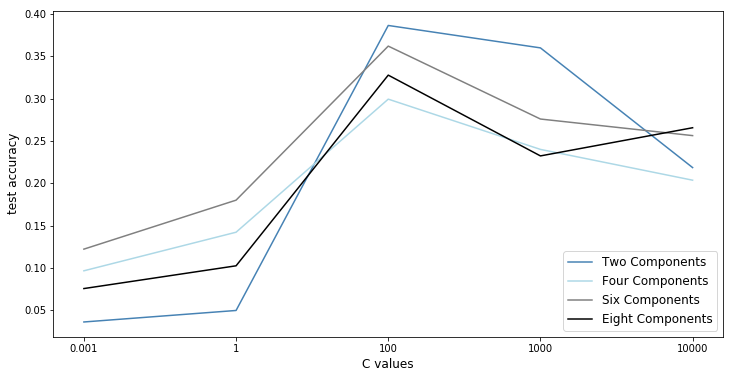

In [19]:
# Plot Accuracy VS n_components for the above classifier
C_values = np.array(['0.001', '1', '100', '1000', '10000'])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
ax.plot(C_values, test_acc[2], color="steelblue", label="Two Components")
ax.plot(C_values, test_acc[4], color="lightblue", label="Four Components")
ax.plot(C_values, test_acc[6], color="grey", label="Six Components")
ax.plot(C_values, test_acc[8], color="black", label="Eight Components")
plt.xticks(C_values)
ax.legend(loc="lower right", fontsize=12)
ax.set_xlabel("C values", fontsize=12)
ax.set_ylabel("test accuracy", fontsize=12)
plt.savefig("SVM-PCA", dpi=200)
plt.show()

In [15]:
# Running a SGD classifier
SGD_clf = SGDClassifier(alpha=0.001, max_iter=100).fit(features_scaled_pca_train, y)
Predictions_SGD = SGD_clf.predict(features_scaled_pca_test)

print("The original classes in the test set are", np.unique(y_test), "\n")
print("The predicted classes are", np.unique(Predictions_SGD), "\n")
print("Missing the following classes in the prediction", np.setdiff1d(np.unique(y_test),np.unique(Predictions_SGD)), "\n")
print("The accuracy for SGD classifier is " + "{:.2%}".format(SGD_clf.score(features_scaled_pca_test, y_test)))

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6  15  16  42  52  53  62  64  65  67  88  90  92  95 991 992 993 994] 

The predicted classes are [90] 

Missing the following classes in the prediction [  6  15  16  42  52  53  62  64  65  67  88  92  95 991 992 993 994] 

The accuracy for Linear SVC One-Vs-One classifier is 47.72%


In [15]:
# Running a SVC classifier

SVC_clf = SVC(decision_function_shape='ovr', random_state=112, C=100, kernel='rbf')
Predictions_SVC_clf = SVC_clf.fit(X,y).predict(X_test)

print("The original classes in the test set are", np.unique(y_test), "\n")
print("The predicted classes are", np.unique(Predictions_SVC_clf), "\n")
print("Missing the following classes in the prediction", np.setdiff1d(np.unique(y_test),np.unique(Predictions_SVC_clf)), "\n")
print("The accuracy for SVC classifier is " + "{:.2%}".format(SVC_clf.score(X_test, y_test)))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [62.] 

Missing the following classes in the prediction [  6.  15.  16.  42.  52.  53.  64.  65.  67.  88.  90.  92.  95. 991.
 992. 993. 994.] 

The accuracy for SVC classifier is 9.09%


In [41]:
# Running a OneVsOneClassifier classifier on transformed features using LinearSVC as the estimator.
classes = np.unique(y_test)

scaler1 = StandardScaler()
scaler1.fit(X)
f_scaled_train = scaler1.transform(X)
scaler1.fit(X_test)
f_scaled_test = scaler1.transform(X_test)

pca1 = PCA(n_components = 6)
pca1.fit(f_scaled_train)
feature_scaled_pca_train = pca1.transform(f_scaled_train)
pca1 = PCA(n_components = 6)
pca1.fit(f_scaled_test)
feature_scaled_pca_test = pca1.transform(f_scaled_test)

SVC_OVO = OneVsOneClassifier(LinearSVC(random_state=112, C=100, penalty='l2', dual=True, tol=1e-13, class_weight='balanced', fit_intercept=False), -1
)

Predictions_SVC_OVO = SVC_OVO.fit(feature_scaled_pca_train,y).predict(feature_scaled_pca_test)

print("The original classes in the test set are", classes, "\n")
print("The predicted classes are", np.unique(Predictions_SVC_OVO), "\n")
print("Missing the following classes in the prediction", np.setdiff1d(classes,np.unique(Predictions_SVC_OVO)), "\n")
test_accuracy = SVC_OVO.score(feature_scaled_pca_test, y_test)
print("The test accuracy for Linear SVC One-Vs-One classifier is " + "{:.2%}".format(test_accuracy))
train_accuracy = SVC_OVO.score(feature_scaled_pca_train, y)
print("The train accuracy for Linear SVC One-Vs-One classifier is " + "{:.2%}".format(train_accuracy))


/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The original classes in the test set are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

The predicted classes are [  6.  15.  16.  42.  52.  53.  62.  64.  65.  67.  88.  90.  92.  95.
 991. 992. 993. 994.] 

Missing the following classes in the prediction [] 

The test accuracy for Linear SVC One-Vs-One classifier is 19.77%
The train accuracy for Linear SVC One-Vs-One classifier is 22.91%


In [13]:
# Plotting confusion matrix

def confusion_matrix_plot(y_true, predictions, name):
    
    cf = confusion_matrix(y_true, predictions)
    plt.figure(figsize = (20,13))
    sn.heatmap(cf, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel('Predicted Label', fontsize=15)
    plt.ylabel('True Label', fontsize=15)
    plt.savefig(name+'.png', dpi=200, bbox_inches='tight')
    plt.show()

Accuracy:  0.5759
Loss:  15.286113402324586
Predicted classes [16. 42. 52. 62. 65. 88. 90. 92. 95.]


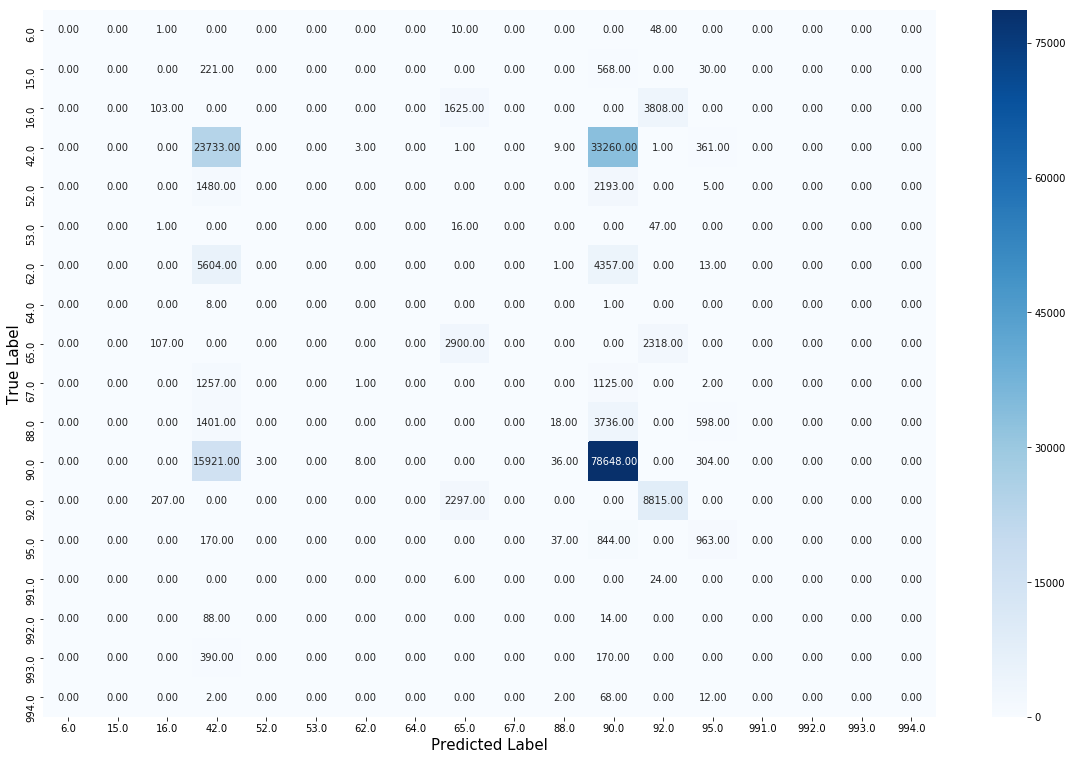

In [14]:
# Decision Tree Classifier
DT = DecisionTreeClassifier(max_depth=9)
Predictions_DT = DT.fit(X,y).predict(X_test)
print("Accuracy: ", DT.score(X_test, y_test))
print("Loss: ", log_loss_wrapper(Predictions_DT))
print("Predicted classes", np.unique(Predictions_DT))
confusion_matrix_plot(y_test, Predictions_DT, 'DecisionTree')

In [15]:
# Running Adaboost classifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
print("Feature Importance", clf.feature_importances_)
AB_Predictions = clf.predict(X_test)
print("Accuracy: ", clf.score(X_test, y_test))
print("Loss: ", log_loss_wrapper(AB_Predictions))
print(np.unique(AB_Predictions))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.   0.   0.   0.   0.   0.55 0.08 0.37 0.  ]
Accuracy:  0.55272
Loss:  16.12160528788432
[42. 90. 92.]


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy 0.578125
Loss:  15.2059162735338


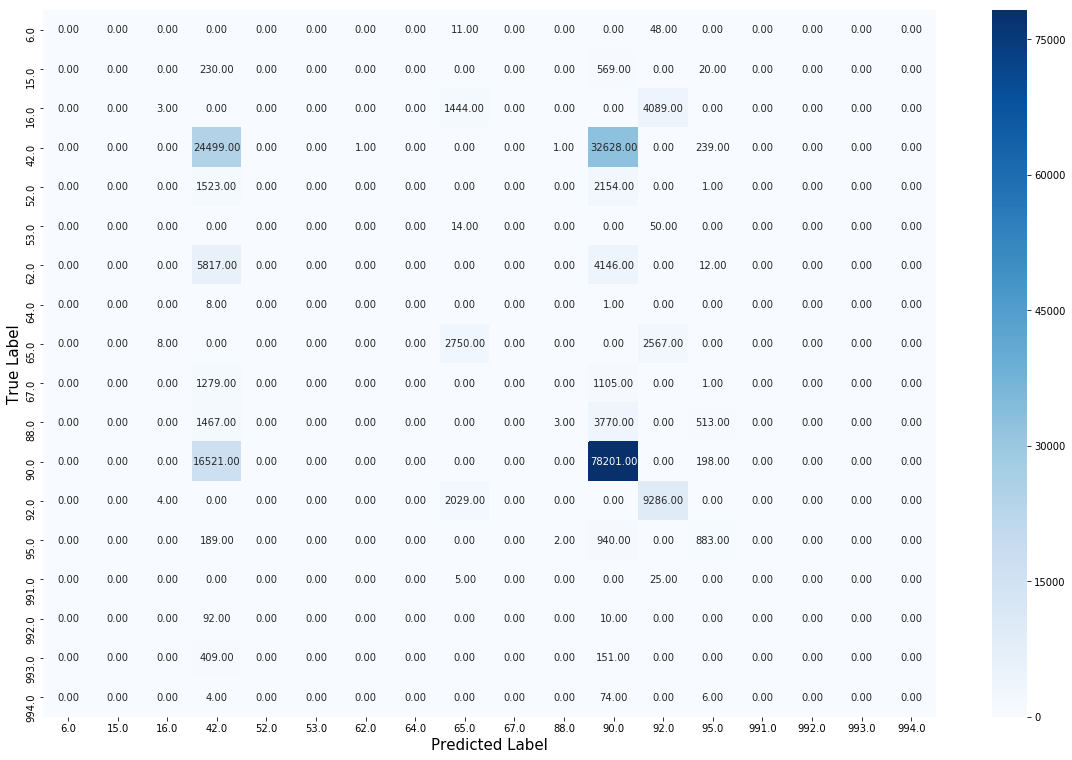

In [20]:
# Running Random Forest classifier
clf = RandomForestClassifier( max_depth=9, random_state=0)
RF_Predictions = clf.fit(X, y).predict(X_test)
print("Accuracy", clf.score(X_test, y_test))
print("Loss: ", log_loss_wrapper(RF_Predictions))
confusion_matrix_plot(y_test, RF_Predictions, 'RF')

In [11]:
# Wrapper function for plasticc_log_loss
def log_loss_wrapper(list_of_pred):
    
    N = []
    targets = np.unique(y_test)
    for i in np.arange(len(targets)):
        N += [len(y_test[y_test == targets[i]])]
    w = N/np.sum(N)

    
    transformed = []
    for i in range(len(list_of_pred)):
        probabilities = (list_of_pred[i] == targets)*1.0
        transformed.append(probabilities)

    transformed_true = []
    for i in range(len(y_test)):
        probabilities = (y_test[i] == targets)*1.0
        transformed_true.append(probabilities)
        
    return plasticc_log_loss(np.array(transformed_true), np.array(transformed),w)


# Credit: https://github.com/LSSTDESC/plasticc-kit/blob/master/plasticc_classification_demo.ipynb
def plasticc_log_loss(y_true, y_pred, relative_class_weights=None):
    
    # sanitize predictions
    predictions = y_pred.copy()
    epsilon = sys.float_info.epsilon # this is machine dependent but essentially prevents log(0)
    predictions = np.clip(predictions, epsilon, 1.0 - epsilon)
    predictions = predictions / np.sum(predictions, axis=1)[:, np.newaxis]

    predictions = np.log(predictions)
    # multiplying the arrays is equivalent to a truth mask as y_true only contains zeros and ones
    class_logloss = []
    j = 0
    for i in range(predictions.shape[1]):
        # average column wise log loss with truth mask applied
        result = np.average(predictions[:, i][y_true[:, i] == 1])
        class_logloss.append(result)
    return -1 * np.average(class_logloss, weights=relative_class_weights)